### Analyzing data on yearly basis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

In [ ]:
file_path = '/content/drive/MyDrive/KPK crimes yearly 2019.xlsx'

df = pd.read_excel(file_path)

print("Columns in the data:")
for column in df.columns:
    print(column)

Columns in the data:
year
province
offense
cases
population
offense/100000


In [ ]:
cases_per_year = df.groupby('year')['cases'].sum()
print("Cases occurred each year:")
print(cases_per_year)

#note that these are not the total crimes occured in respective year. The data reflects the number on specific crime types only. Complete details in presentation.

Cases occurred each year:
year
2010    136665
2011    145856
2012    147807
2013    142757
2014    137465
2015    151958
2016    133283
2017     97719
2018     51864
2019     53875
Name: cases, dtype: int64


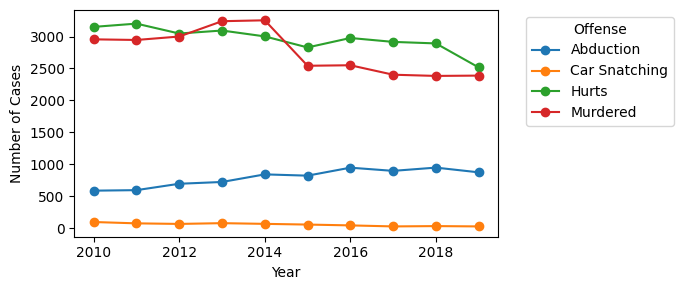

In [ ]:
selected_offenses = ['Abduction', 'Murdered', 'Car Snatching', 'Hurts']
filtered_df = df[df['offense'].isin(selected_offenses)]

offense_analysis = filtered_df.groupby(['year', 'offense'])['cases'].sum().unstack()

offense_analysis.plot(kind='line', marker='o', figsize=(7, 3))
plt.xlabel('Year')
plt.ylabel('Number of Cases')
#plt.grid(True)
plt.legend(title='Offense', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Division and District Level Crime Analysis

In [ ]:
file_path = '/content/drive/MyDrive/District crimes kpk 2019.xlsx'

data = pd.read_excel(file_path)

print("Columns in the data:")
for column in data.columns:
    print(column)

Columns in the data:
year
province
division
district
crime type
cases


In [ ]:
divisions = data['division'].unique()

print("Names of Divisions:")
for division in divisions:
    print(division)

Names of Divisions:
Hazara 
Bannu
Malakand
Peshawar
D.I.Khan
Kohat
Mardan


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of cases in each division from 2011-19

In [ ]:
division_total_crimes = data.groupby(['division', 'year'])['cases'].sum().reset_index()

print(division_total_crimes)

    division  year  cases
0      Bannu  2011    358
1      Bannu  2012    357
2      Bannu  2013    431
3      Bannu  2014    558
4      Bannu  2015    484
..       ...   ...    ...
58  Peshawar  2015   1271
59  Peshawar  2016   1255
60  Peshawar  2017   1151
61  Peshawar  2018   1124
62  Peshawar  2019   1147

[63 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


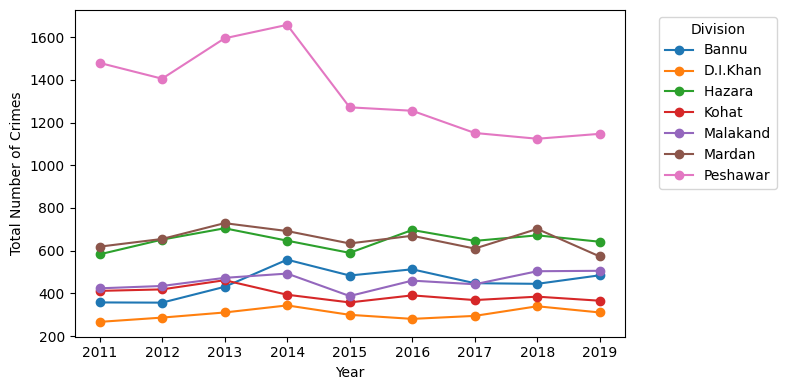

In [ ]:
division_total_crimes = data.groupby(['division', 'year'])['cases'].sum().reset_index()
pivot_table = division_total_crimes.pivot(index='year', columns='division', values='cases')

pivot_table.plot(figsize=(8, 4), marker='o')
#plt.title('Total Number of Crimes in Each Division Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
#plt.grid(True)
#plt.xticks(range(division_total_murders['year'].min(), division_total_murders['year'].max() + 1))
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Analyzing murder cases by each division

In [ ]:
murder_data = data[data['crime type'] == 'Murder']
division_total_murders = murder_data.groupby(['division', 'year'])['cases'].sum().reset_index()

print(division_total_murders)

    division  year  cases
0      Bannu  2011    293
1      Bannu  2012    279
2      Bannu  2013    335
3      Bannu  2014    436
4      Bannu  2015    371
..       ...   ...    ...
58  Peshawar  2015    791
59  Peshawar  2016    799
60  Peshawar  2017    713
61  Peshawar  2018    685
62  Peshawar  2019    714

[63 rows x 3 columns]


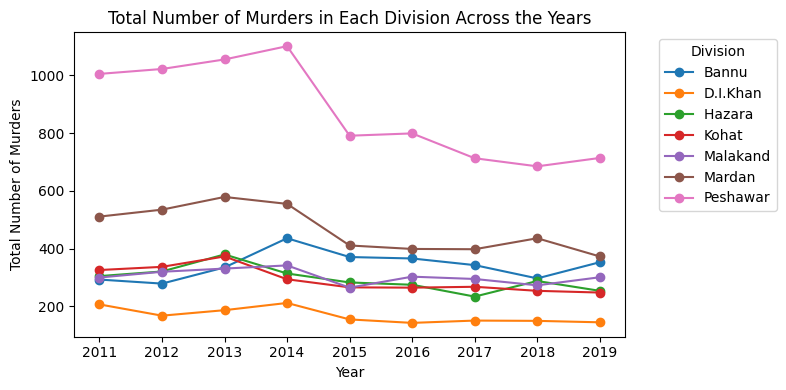

In [ ]:
division_total_murders['year'] = division_total_murders['year'].astype(int)

pivot_table_murders = division_total_murders.pivot(index='year', columns='division', values='cases')
pivot_table_murders.plot(figsize=(8, 4), marker='o')
plt.title('Total Number of Murders in Each Division Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Murders')
#plt.grid(True)
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(range(division_total_murders['year'].min(), division_total_murders['year'].max() + 1))

plt.tight_layout()
plt.show()

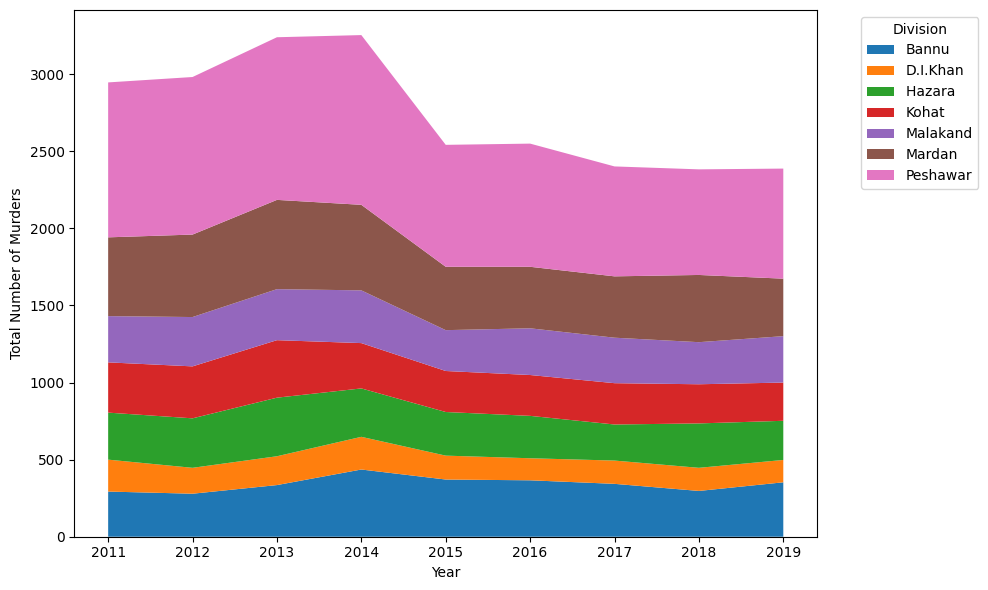

In [ ]:
# Create a stacked area plot for each division
plt.figure(figsize=(10, 6))
plt.stackplot(pivot_table_murders.index, pivot_table_murders.values.T, labels=pivot_table_murders.columns)

# Add labels and title
#plt.title('Total Number of Murders in Each Division Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Murders')
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.grid(True)

# Set x-axis ticks to integer years
plt.xticks(range(division_total_murders['year'].min(), division_total_murders['year'].max() + 1))

plt.tight_layout()
plt.show()


Analyzing murder cases in the districts of Peshawer

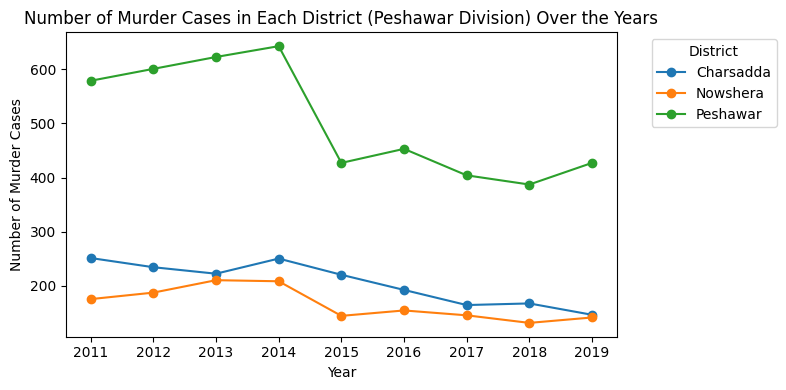

In [ ]:
murder_data_peshawar = data[(data['division'] == 'Peshawar') & (data['crime type'] == 'Murder')]
murder_cases_by_district_year_peshawar = murder_data_peshawar.groupby(['district', 'year'])['cases'].sum().reset_index()
pivot_table_murder_cases_peshawar = murder_cases_by_district_year_peshawar.pivot(index='year', columns='district', values='cases')

pivot_table_murder_cases_peshawar.plot(figsize=(8, 4), marker='o')
plt.title('Number of Murder Cases in Each District (Peshawar Division) Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Murder Cases')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Analayzing abduction cases by each Division

In [ ]:
abduction_data = data[data['crime type'] == 'Abduction']
division_total_abductions = abduction_data.groupby(['division', 'year'])['cases'].sum().reset_index()

print(division_total_abductions)

    division  year  cases
0      Bannu  2011     55
1      Bannu  2012     48
2      Bannu  2013     54
3      Bannu  2014     76
4      Bannu  2015     64
..       ...   ...    ...
58  Peshawar  2015    138
59  Peshawar  2016    158
60  Peshawar  2017    140
61  Peshawar  2018    147
62  Peshawar  2019    133

[63 rows x 3 columns]


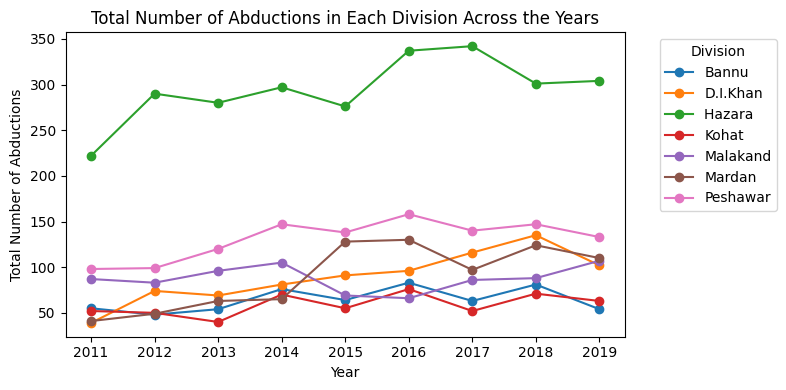

In [ ]:
division_total_abductions['year'] = division_total_abductions['year'].astype(int)
pivot_table_abductions = division_total_abductions.pivot(index='year', columns='division', values='cases')
pivot_table_abductions.plot(figsize=(8, 4), marker='o')
plt.title('Total Number of Abductions in Each Division Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Abductions')
#plt.grid(True)

plt.xticks(range(division_total_murders['year'].min(), division_total_murders['year'].max() + 1))
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

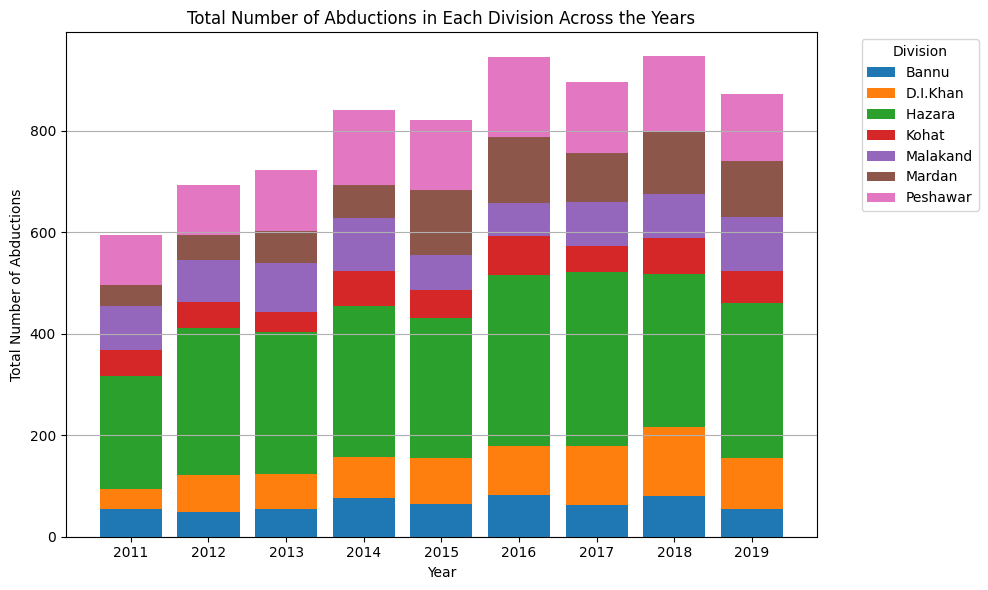

In [ ]:
plt.figure(figsize=(10, 6))

# Calculate the cumulative sum for each division
cumulative_abductions = pivot_table_abductions.cumsum(axis=1)

# Create stacked bar plot
bottom = None
for division in pivot_table_abductions.columns:
    plt.bar(pivot_table_abductions.index, pivot_table_abductions[division], bottom=bottom, label=division)
    if bottom is None:
        bottom = pivot_table_abductions[division].values
    else:
        bottom += pivot_table_abductions[division].values

# Add labels and title
plt.title('Total Number of Abductions in Each Division Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Abductions')
plt.xticks(range(division_total_abductions['year'].min(), division_total_abductions['year'].max() + 1))
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


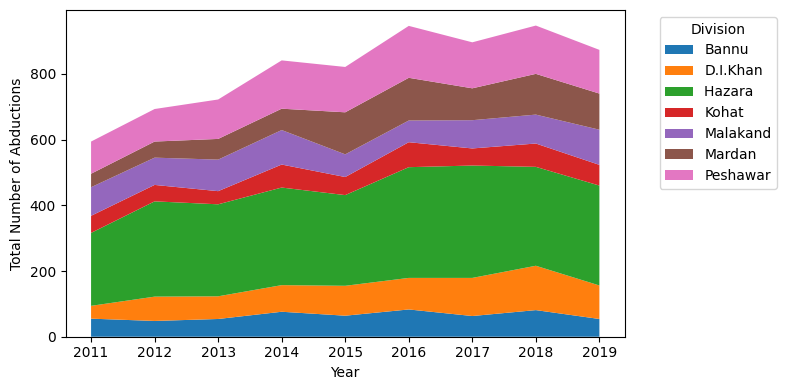

In [ ]:
# Ensure the 'year' column is of integer type
division_total_abductions['year'] = division_total_abductions['year'].astype(int)

# Pivot the data to have years as index, divisions as columns, and total abduction cases as values
pivot_table_abductions = division_total_abductions.pivot(index='year', columns='division', values='cases')

# Plotting stacked area plot
plt.figure(figsize=(8, 4))
plt.stackplot(pivot_table_abductions.index, pivot_table_abductions.values.T, labels=pivot_table_abductions.columns)

# Adding labels and title
#plt.title('Total Number of Abductions in Each Division Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Abductions')
plt.xticks(range(division_total_abductions['year'].min(), division_total_abductions['year'].max() + 1))
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Exploring abduction cases in Hazara Division further

In [ ]:
hazara_districts = data[data['division'] == 'Hazara ']
num_districts_hazara = hazara_districts['district'].nunique()

print("Number of districts in Hazara division:", num_districts_hazara)


Number of districts in Hazara division: 6


In [ ]:
districts_hazara = hazara_districts['district'].unique()
print("Districts in Hazara division:")
for district in districts_hazara:
    print(district)

Districts in Hazara division:
Abbottabad
Battagram
Haripur
Kohistan
Mansehra
Tor Ghar


In [ ]:
abduction_data_hazara = data[(data['division'] == 'Hazara ') & (data['crime type'] == 'Abduction')]
abduction_cases_by_district_year = abduction_data_hazara.groupby(['district', 'year'])['cases'].sum().reset_index()
for district in abduction_cases_by_district_year['district'].unique():
    print("District:", district)
    district_data = abduction_cases_by_district_year[abduction_cases_by_district_year['district'] == district]
    for index, row in district_data.iterrows():
        print("\tYear:", row['year'], "\tAbduction Cases:", row['cases'])

District: Abbottabad
	Year: 2011 	Abduction Cases: 127
	Year: 2012 	Abduction Cases: 103
	Year: 2013 	Abduction Cases: 102
	Year: 2014 	Abduction Cases: 117
	Year: 2015 	Abduction Cases: 109
	Year: 2016 	Abduction Cases: 119
	Year: 2017 	Abduction Cases: 77
	Year: 2018 	Abduction Cases: 70
	Year: 2019 	Abduction Cases: 100
District: Battagram
	Year: 2011 	Abduction Cases: 17
	Year: 2012 	Abduction Cases: 11
	Year: 2013 	Abduction Cases: 10
	Year: 2014 	Abduction Cases: 22
	Year: 2015 	Abduction Cases: 18
	Year: 2016 	Abduction Cases: 25
	Year: 2017 	Abduction Cases: 20
	Year: 2018 	Abduction Cases: 23
	Year: 2019 	Abduction Cases: 25
District: Haripur
	Year: 2011 	Abduction Cases: 43
	Year: 2012 	Abduction Cases: 36
	Year: 2013 	Abduction Cases: 42
	Year: 2014 	Abduction Cases: 47
	Year: 2015 	Abduction Cases: 35
	Year: 2016 	Abduction Cases: 48
	Year: 2017 	Abduction Cases: 83
	Year: 2018 	Abduction Cases: 66
	Year: 2019 	Abduction Cases: 48
District: Kohistan
	Year: 2011 	Abduction C

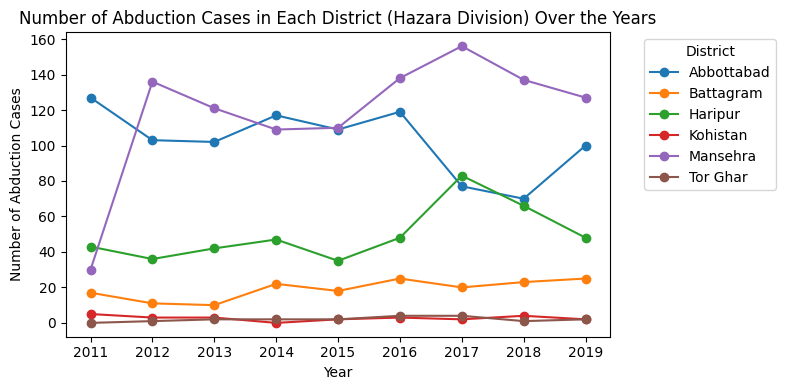

In [ ]:
abduction_cases_by_district_year = abduction_data_hazara.groupby(['district', 'year'])['cases'].sum().reset_index()
pivot_table_abduction_cases = abduction_cases_by_district_year.pivot(index='year', columns='district', values='cases')
ax = pivot_table_abduction_cases.plot(figsize=(8, 4), marker='o')
plt.title('Number of Abduction Cases in Each District (Hazara Division) Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Abduction Cases')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [ ]:
hazara_abductions = abduction_data[abduction_data['division'] == 'Hazara ']

hazara_abductions_by_year = hazara_abductions.groupby('year')['cases'].sum().reset_index()

print(hazara_abductions_by_year)

   year  cases
0  2011    222
1  2012    290
2  2013    280
3  2014    297
4  2015    276
5  2016    337
6  2017    342
7  2018    301
8  2019    304


Exploring Abduction in Malakand

In [ ]:
abduction_data_malakand = data[(data['division'] == 'Malakand') & (data['crime type'] == 'Abduction')]
abduction_cases_by_district_year_malakand = abduction_data_malakand.groupby(['district', 'year'])['cases'].sum().reset_index()

print(abduction_cases_by_district_year_malakand)

   district  year  cases
0     Buner  2011      6
1     Buner  2012      6
2     Buner  2013     15
3     Buner  2014     14
4     Buner  2015     15
..      ...   ...    ...
58     Swat  2015      7
59     Swat  2016     15
60     Swat  2017     10
61     Swat  2018      5
62     Swat  2019      3

[63 rows x 3 columns]


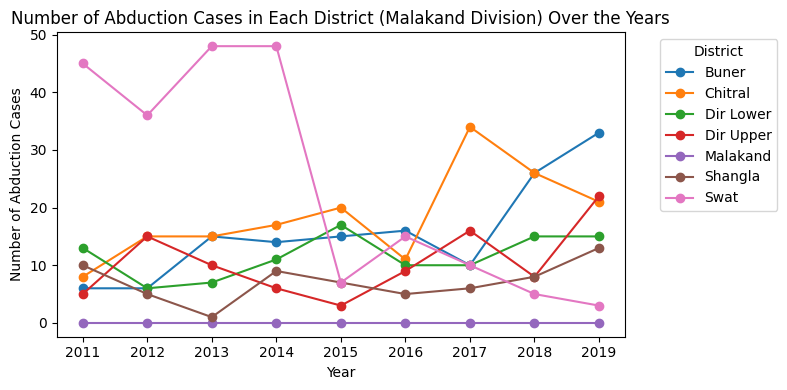

In [ ]:
abduction_cases_by_district_year_malakand = abduction_data_malakand.groupby(['district', 'year'])['cases'].sum().reset_index()
pivot_table_abduction_cases_malakand = abduction_cases_by_district_year_malakand.pivot(index='year', columns='district', values='cases')
pivot_table_abduction_cases_malakand.plot(figsize=(8, 4), marker='o')
plt.title('Number of Abduction Cases in Each District (Malakand Division) Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Abduction Cases')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

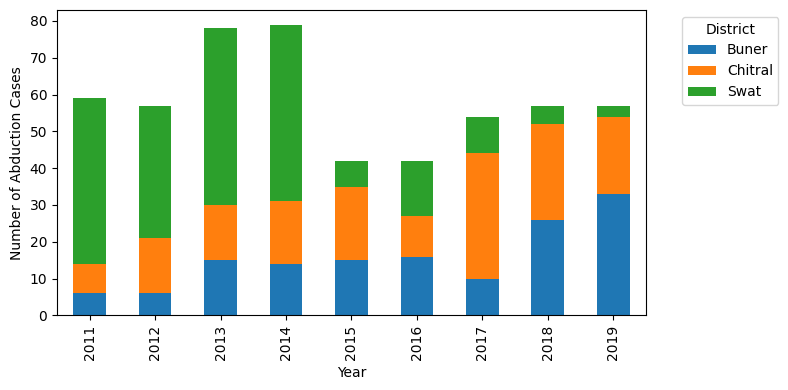

In [ ]:

districts_to_plot = ['Buner', 'Chitral', 'Swat']
abduction_cases_to_plot = pivot_table_abduction_cases_malakand[districts_to_plot]

# Plotting
# Stacked Bar Plot
abduction_cases_to_plot.plot(kind='bar', stacked=True, figsize=(8, 4))
#plt.title('Distribution of Abduction Cases in Buner, Chitral, and Swat Districts (Malakand Division) Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Abduction Cases')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Analyzing car snatching cases by each Division

In [ ]:
car_snatching_data = data[data['crime type'] == 'Car Snatching']
division_total_car_snatchings = car_snatching_data.groupby(['division', 'year'])['cases'].sum().reset_index()

print(division_total_car_snatchings)

    division  year  cases
0      Bannu  2011      1
1      Bannu  2012      4
2      Bannu  2013      1
3      Bannu  2014      6
4      Bannu  2015      3
..       ...   ...    ...
58  Peshawar  2015     37
59  Peshawar  2016     23
60  Peshawar  2017     15
61  Peshawar  2018     20
62  Peshawar  2019     16

[63 rows x 3 columns]


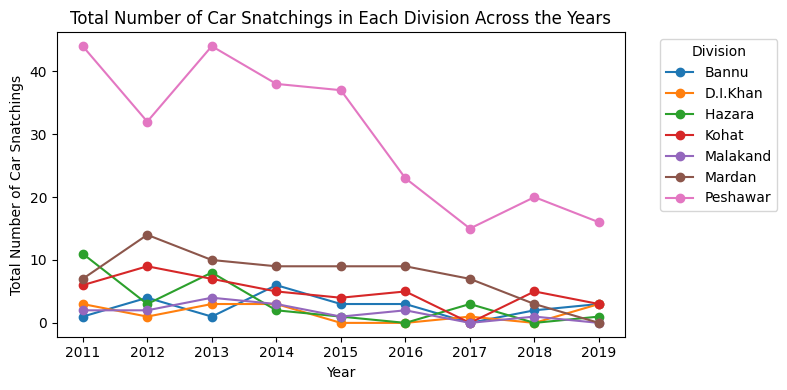

In [ ]:
division_total_car_snatchings['year'] = division_total_car_snatchings['year'].astype(int)
pivot_table_car_snatchings = division_total_car_snatchings.pivot(index='year', columns='division', values='cases')
pivot_table_car_snatchings.plot(figsize=(8, 4), marker='o')
plt.title('Total Number of Car Snatchings in Each Division Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Car Snatchings')
#plt.grid(True)
plt.xticks(range(division_total_murders['year'].min(), division_total_murders['year'].max() + 1))
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Impact of each Division on the provice law and order

In [ ]:
file_path = '/content/drive/MyDrive/division analysis total.xlsx'

division_data = pd.read_excel(file_path)

print("Columns in the data:")
for column in division_data.columns:
    print(column)


Columns in the data:
division
population
total area
population density
police stations
total cases


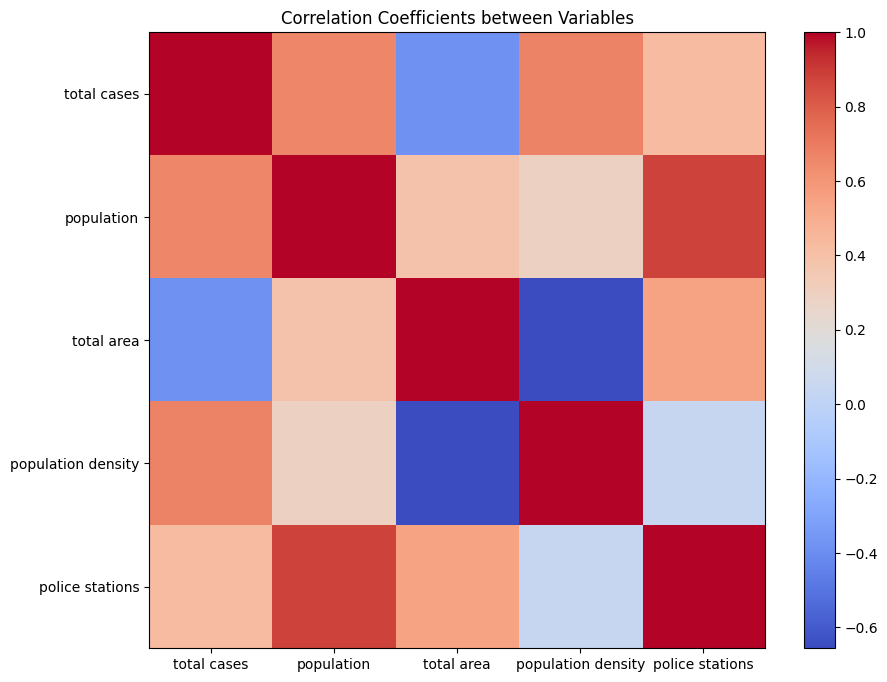

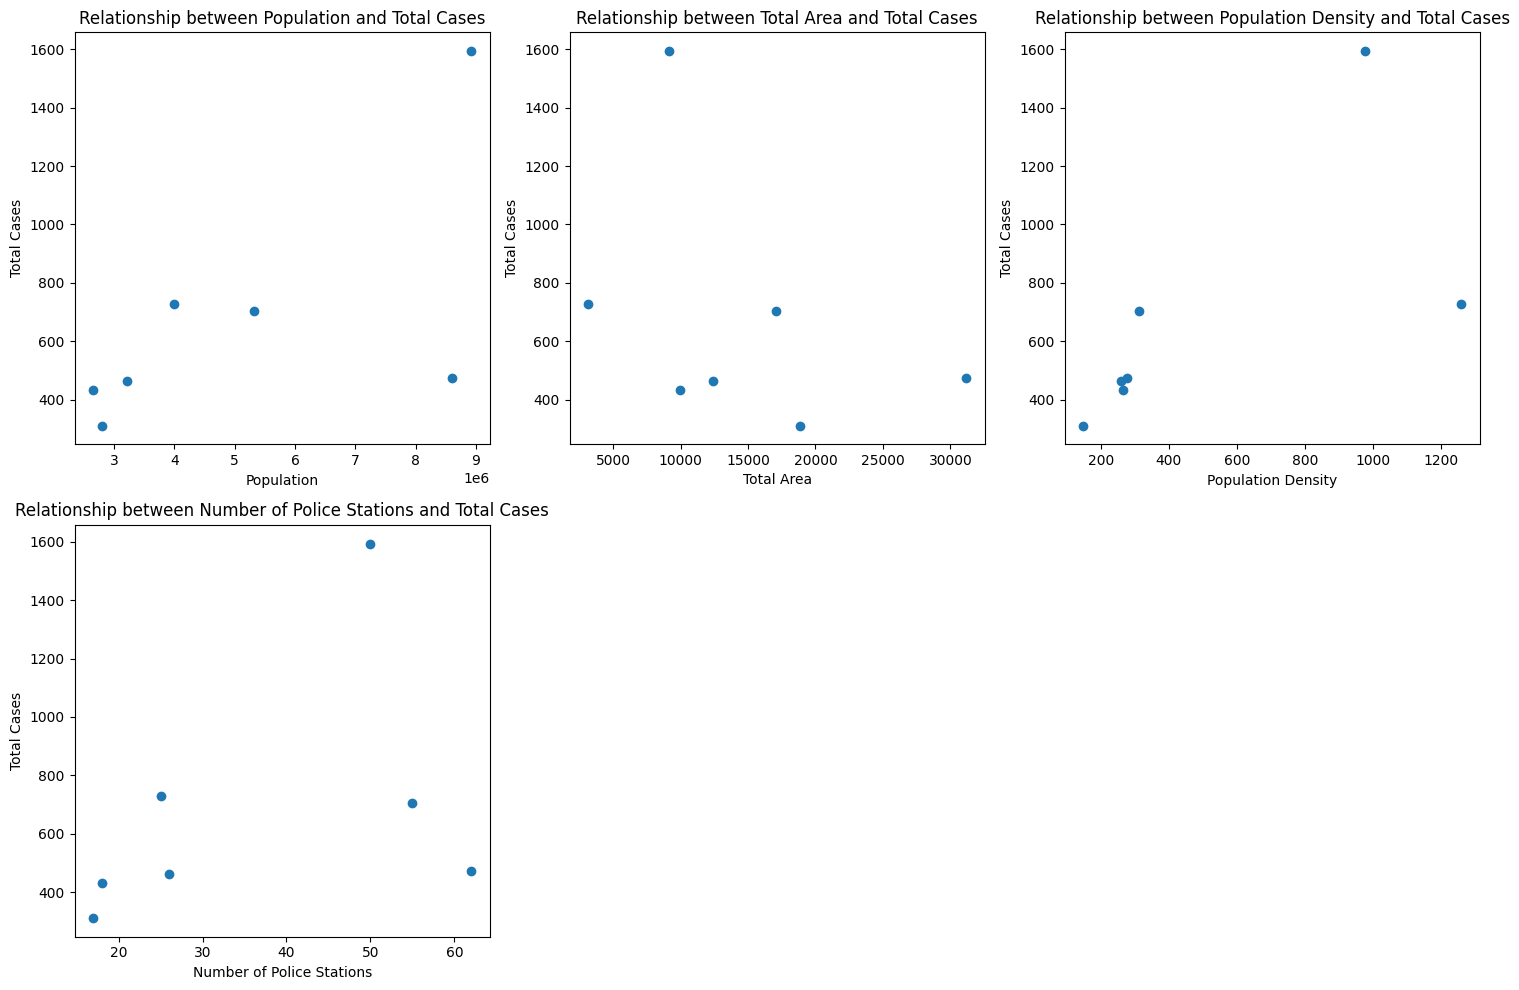

In [ ]:
correlation_coefficients = division_data[['total cases', 'population', 'total area', 'population density', 'police stations']].corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_coefficients, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_coefficients.columns)), correlation_coefficients.columns)
plt.yticks(range(len(correlation_coefficients.columns)), correlation_coefficients.columns)
plt.title('Correlation Coefficients between Variables')
plt.show()


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(division_data['population'], division_data['total cases'])
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.title('Relationship between Population and Total Cases')

plt.subplot(2, 3, 2)
plt.scatter(division_data['total area'], division_data['total cases'])
plt.xlabel('Total Area')
plt.ylabel('Total Cases')
plt.title('Relationship between Total Area and Total Cases')

plt.subplot(2, 3, 3)
plt.scatter(division_data['population density'], division_data['total cases'])
plt.xlabel('Population Density')
plt.ylabel('Total Cases')
plt.title('Relationship between Population Density and Total Cases')

plt.subplot(2, 3, 4)
plt.scatter(division_data['police stations'], division_data['total cases'])
plt.xlabel('Number of Police Stations')
plt.ylabel('Total Cases')
plt.title('Relationship between Number of Police Stations and Total Cases')

plt.tight_layout()
plt.show()


Analyzing co-relation of police stations with crimes in districts

In [ ]:
output_file_path = 'district_cases_over_years.xlsx'
district_cases_over_years.to_excel(output_file_path, index=False)

print("Data saved to", output_file_path)

Data saved to district_cases_over_years.xlsx


In [ ]:
file_path = '/content/drive/MyDrive/Number of police stations.xlsx'
data = pd.read_excel(file_path)

print(data.head())


   district  number of police stations  number of cases
0  Peshawer                         40              719
1      Swat                         23              153
2    Mardan                         19              352
3     Bannu                         19              250
4  D.I.Khan                         18              240


In [ ]:
correlation_coefficient = data['number of police stations'].corr(data['number of cases'])

print("Correlation coefficient between police stations and crime cases:", correlation_coefficient)

Correlation coefficient between police stations and crime cases: 0.8675606251446296


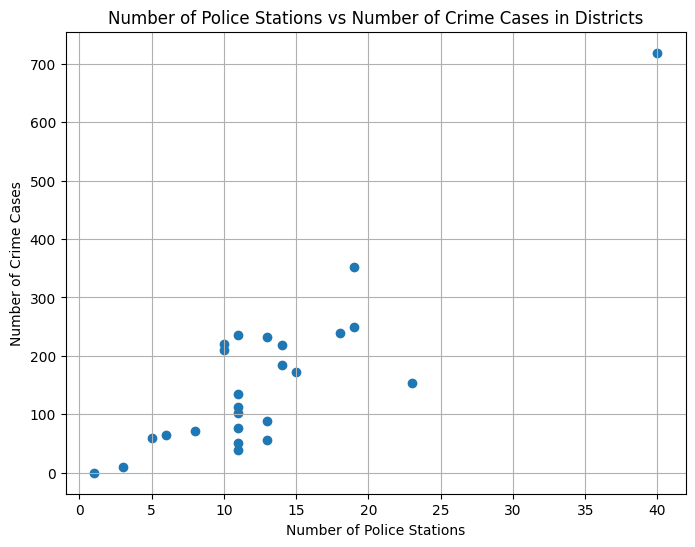

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['number of police stations'], data['number of cases'])
plt.title('Number of Police Stations vs Number of Crime Cases in Districts')
plt.xlabel('Number of Police Stations')
plt.ylabel('Number of Crime Cases')
plt.grid(True)
plt.show()

In [ ]:
file_path = '/content/drive/MyDrive/police stations data.xlsx'

df = pd.read_excel(file_path)

print("Columns in the data:")
for column in df.columns:
    print(column)

Columns in the data:
district
number of police stations
number of cases
population
total area
population desnity


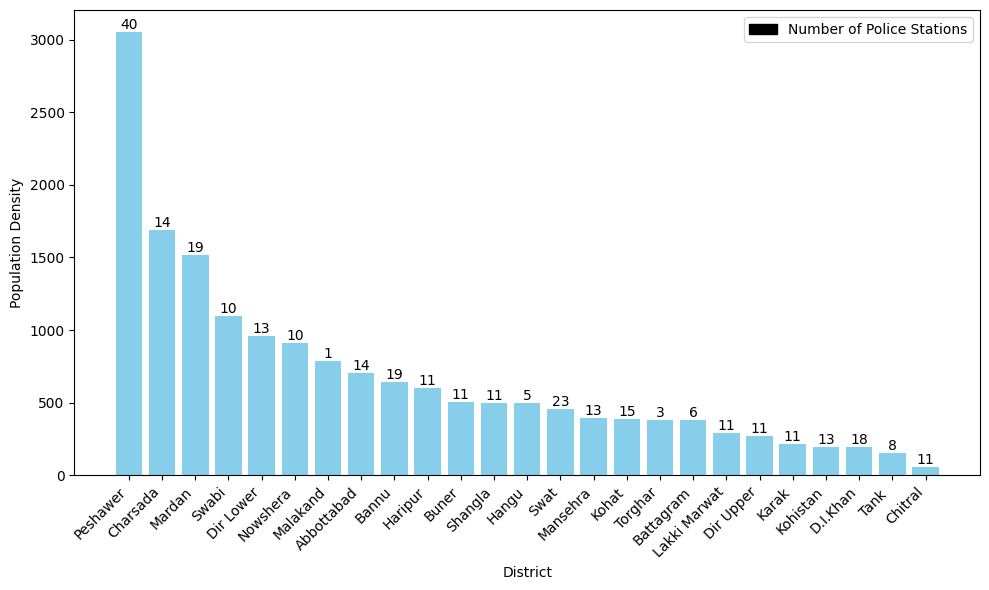

In [ ]:
df_sorted = df.sort_values(by='population desnity', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(df_sorted['district'], df_sorted['population desnity'], color='skyblue')

for bar, num_police_stations in zip(bars, df_sorted['number of police stations']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(num_police_stations),
             ha='center', va='bottom', color='black')
blue_patch = mpatches.Patch(color='black', label='Number of Police Stations')
plt.legend(handles=[blue_patch])

plt.xlabel('District')
plt.ylabel('Population Density')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Association Rule Mining

In [ ]:
file_path = '/content/drive/MyDrive/District crimes kpk 2019.xlsx'

data = pd.read_excel(file_path)

print("Columns in the data:")
for column in data.columns:
    print(column)

Columns in the data:
year
province
division
district
crime type
cases


In [ ]:
filtered_data = data[data['cases'] > 0]

crime_types_text_yearly = filtered_data.groupby(['year', 'district'])['crime type'].apply(lambda x: ', '.join(x.unique())).reset_index()
print(crime_types_text_yearly)

     year    district                                         crime type
0    2011  Abbottabad  Murder, Child Lifting, Abduction, Car Theft, C...
1    2011       Bannu  Murder, Kids:Ransom, Child Lifting, Abduction,...
2    2011   Battagram          Murder, Kids:Ransom, Abduction, Car Theft
3    2011       Buner                   Murder, Abduction, M.Cycle Theft
4    2011   Charsadda  Murder, Kids:Ransom, Abduction, Car Theft, Car...
..    ...         ...                                                ...
211  2019     Shangla        Murder, Abduction, Car Theft, M.Cycle Theft
212  2019       Swabi  Murder, Kids:Ransom, Child Lifting, Abduction,...
213  2019        Swat  Murder, Kids:Ransom, Child Lifting, Abduction,...
214  2019        Tank                   Murder, Abduction, M.Cycle Theft
215  2019    Tor Ghar                   Murder, Abduction, M.Cycle Theft

[216 rows x 3 columns]


In [ ]:
filtered_data = data[data['cases'] > 0]

crime_types_text_yearly = filtered_data.groupby(['year', 'district'])['crime type'].apply(lambda x: ', '.join(x.unique())).reset_index()
output_file_path = 'crime_types_by_district_yearly.xlsx'
crime_types_text_yearly.to_excel(output_file_path, index=False)

print("Result saved to:", output_file_path)


Result saved to: crime_types_by_district_yearly.xlsx


In [ ]:
file_path = '/content/crime_types_by_district_yearly.xlsx'

transaction_df = pd.read_excel(file_path)

In [ ]:
column_names = transaction_df.columns

print("Column names:")
for column_name in column_names:
    print(column_name)

Column names:
year
district
crime type


In [ ]:
transaction_df.rename(columns={'crime type' : 'item_list'}, inplace=True)
transaction_df.index.rename('TID', inplace=True)

In [ ]:
trans_df = transaction_df.item_list.str.split(',')
trans_df

TID
0      [Murder,  Child Lifting,  Abduction,  Car Thef...
1      [Murder,  Kids:Ransom,  Child Lifting,  Abduct...
2         [Murder,  Kids:Ransom,  Abduction,  Car Theft]
3                   [Murder,  Abduction,  M.Cycle Theft]
4      [Murder,  Kids:Ransom,  Abduction,  Car Theft,...
                             ...                        
211     [Murder,  Abduction,  Car Theft,  M.Cycle Theft]
212    [Murder,  Kids:Ransom,  Child Lifting,  Abduct...
213    [Murder,  Kids:Ransom,  Child Lifting,  Abduct...
214                 [Murder,  Abduction,  M.Cycle Theft]
215                 [Murder,  Abduction,  M.Cycle Theft]
Name: item_list, Length: 216, dtype: object

In [ ]:
def prune(data,supp):

    df = data[data.supp_count >= supp]
    return df

def count_itemset(transaction_df, itemsets):

    count_item = {}
    for item_set in itemsets:
        set_A = set(item_set)
        for row in trans_df:
            set_B = set(row)

            if set_B.intersection(set_A) == set_A:
                if item_set in count_item.keys():
                    count_item[item_set] += 1

                else:
                    count_item[item_set] = 1

    data = pd.DataFrame()
    data['item_sets'] = count_item.keys()
    data['supp_count'] = count_item.values()

    return data

def count_item(trans_items):

    count_ind_item = {}
    for row in trans_items:
        for i in range(len(row)):
            if row[i] in count_ind_item.keys():
                count_ind_item[row[i]] += 1
            else:
                count_ind_item[row[i]] = 1

    data = pd.DataFrame()
    data['item_sets'] = count_ind_item.keys()
    data['supp_count'] = count_ind_item.values()
    data = data.sort_values('item_sets')
    return data


def join(list_of_items):
    itemsets = []
    i = 1
    for entry in list_of_items:
        proceding_items = list_of_items[i:]
        for item in proceding_items:
            if(type(item) is str):
                if entry != item:
                    tuples = (entry, item)
                    itemsets.append(tuples)
            else:
                if entry[0:-1] == item[0:-1]:
                    tuples = entry+item[1:]
                    itemsets.append(tuples)
        i = i+1
    if(len(itemsets) == 0):
        return None
    return itemsets


In [ ]:

def apriori(trans_data,supp=3, con=0.5):
    freq = pd.DataFrame()

    df = count_item(trans_data)

    while(len(df) != 0):

        df = prune(df, supp)

        if len(df) > 1 or (len(df) == 1 and int(df.supp_count >= supp)):
            freq = df

        itemsets = join(df.item_sets)

        if(itemsets is None):
            return freq

        df = count_itemset(trans_data, itemsets)
    return df

In [ ]:
freq_item_sets = apriori(trans_df, 4)

<ipython-input-23-fc344ff9ce8a>:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if len(df) > 1 or (len(df) == 1 and int(df.supp_count >= supp)):


In [ ]:
freq_item_sets

,item_sets,supp_count
0,"( Abduction, Car Snatching, Car Theft, Car ...",49


In [ ]:
def calculate_conf(value1, value2):
    return round(int(value1)/int(value2) * 100, 2)

In [ ]:
def strong_rules(freq_item_sets, threshold):

    confidences = {}
    for row in freq_item_sets.item_sets:
        for i in range(len(row)):
            for j in range(len(row)):
                 if i != j:
                    tuples = (row[i], row[j])
                    conf = calculate_conf(freq_item_sets[freq_item_sets.item_sets == row].supp_count, count_item(trans_df)[count_item(trans_df).item_sets == row[i]].supp_count)
                    confidences[tuples] = conf


    conf_df = pd.DataFrame()
    conf_df['item_set'] = confidences.keys()
    conf_df['confidence'] = confidences.values()

    return conf_df[conf_df.confidence >= threshold]



In [ ]:
strong_rules(freq_item_sets, 40.0)

<ipython-input-27-c711a333c29f>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return round(int(value1)/int(value2) * 100, 2)
<ipython-input-27-c711a333c29f>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return round(int(value1)/int(value2) * 100, 2)
<ipython-input-27-c711a333c29f>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return round(int(value1)/int(value2) * 100, 2)
<ipython-input-27-c711a333c29f>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return round(int(value1)/int(value2) * 100, 2)
<ipython-input-27-c711a333c29f>:2: FutureWarning: Calling int on a single element Series is deprecated and w

,item_set,confidence
6,"( Car Snatching, Abduction)",49.00
7,"( Car Snatching, Car Theft)",49.00
8,"( Car Snatching, Car Snatching)",49.00
9,"( Car Snatching, Child Lifting)",49.00
10,"( Car Snatching, Kids:Ransom)",49.00
11,"( Car Snatching, M.Cycle Theft)",49.00
12,"( Car Snatching, Murder)",49.00
20,"( Child Lifting, Abduction)",42.61
21,"( Child Lifting, Car Snatching)",42.61
22,"( Child Lifting, Car Theft)",42.61


In [ ]:
from functools import reduce # Valid in Python 2.6+, required in Python 3
import operator

def interesting_rules(freq_item_sets):

    lifts = {}
    prob_of_items = []

    for row in freq_item_sets.item_sets:
        num_of_items = len(row)

        prob_all = freq_item_sets[freq_item_sets.item_sets == row].supp_count / 18
        for i in range(num_of_items):
            prob_of_items.append(count_item(trans_df)[count_item(trans_df).item_sets == row[i]].supp_count / 18)

        lifts[row] = round(float(prob_all / reduce(operator.mul, (np.array(prob_of_items)), 1)), 2)

        prob_of_items = []


    lifts_df = pd.DataFrame()
    lifts_df['Rules'] = lifts.keys()
    lifts_df['lift'] = lifts.values()

    return lifts_df


In [ ]:
import numpy as np
import math

In [ ]:
int_rules = interesting_rules(freq_item_sets)
int_rules

<ipython-input-35-32eaf32c81bc>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lifts[row] = round(float(prob_all / reduce(operator.mul, (np.array(prob_of_items)), 1)), 2)


,Rules,lift
0,"( Abduction, Car Snatching, Car Theft, Car ...",0.0


In [ ]:
print("sleep..")

sleep..


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
